# 01 IO and Basic Data Structures
*01 IO と基本データ構造*

This notebook explains how to read and write data files with Wandas, and introduces the fundamental data structures. You'll learn how to create **ChannelFrame** objects using `read_wav` and `read_csv` functions, and understand their basic properties.

*このノートブックではWandasを使用したデータファイルの読み書き方法と基本的なデータ構造について説明します。`read_wav`と`read_csv`関数を使用して**ChannelFrame**オブジェクトを作成し、その基本的な特性を理解します。*

## File I/O Overview
*ファイル入出力の概要*

Wandas supports various file formats for data import and export. The main supported formats are:

*Wandasはデータのインポートとエクスポートにさまざまなファイル形式をサポートしています。主なサポート形式は以下の通りです：*

- **WAV files** (.wav): Audio data with multiple channels  
  *音声データ（複数チャンネルに対応）*
- **CSV files** (.csv): Time series data in tabular format  
  *表形式の時系列データ*
- **WDF files** (.wdf): Wandas Data Format for storing ChannelFrames with metadata  
  *メタデータを保持したChannelFrameを格納するWandasデータ形式*

Each format has its own reader and writer functions that make working with data files simple and intuitive.

*各形式には独自のリーダーおよびライター関数があり、データファイルの操作が簡単かつ直感的に行えます。*

/workspaces/wandas/wandas/io/wav_io.py:44: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(file_obj)



ChannelFrame information:
Number of channels: 2
Number of samples: 661500
Sampling rate: 44100 Hz
Duration: 15.00 seconds

Visualizing the audio data:


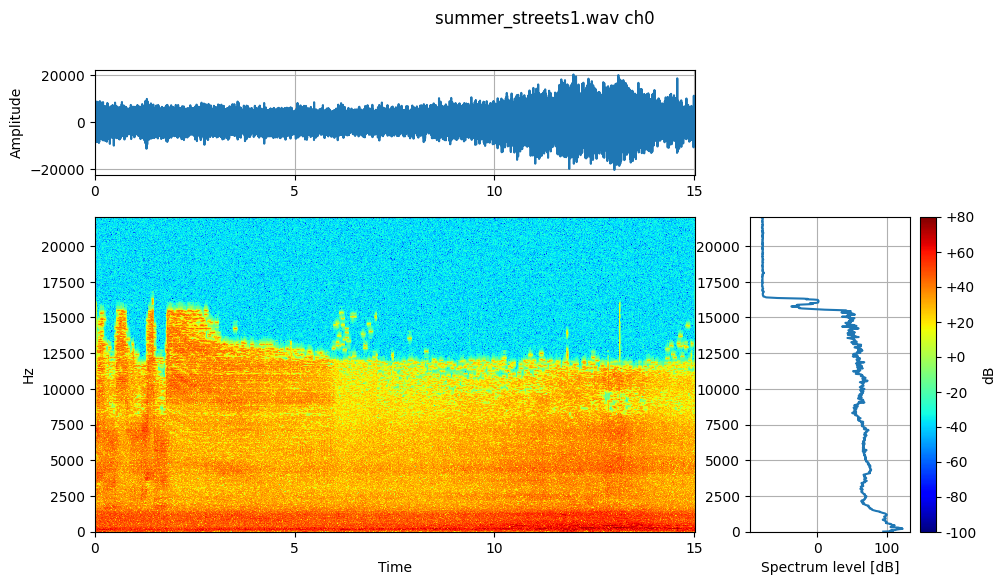

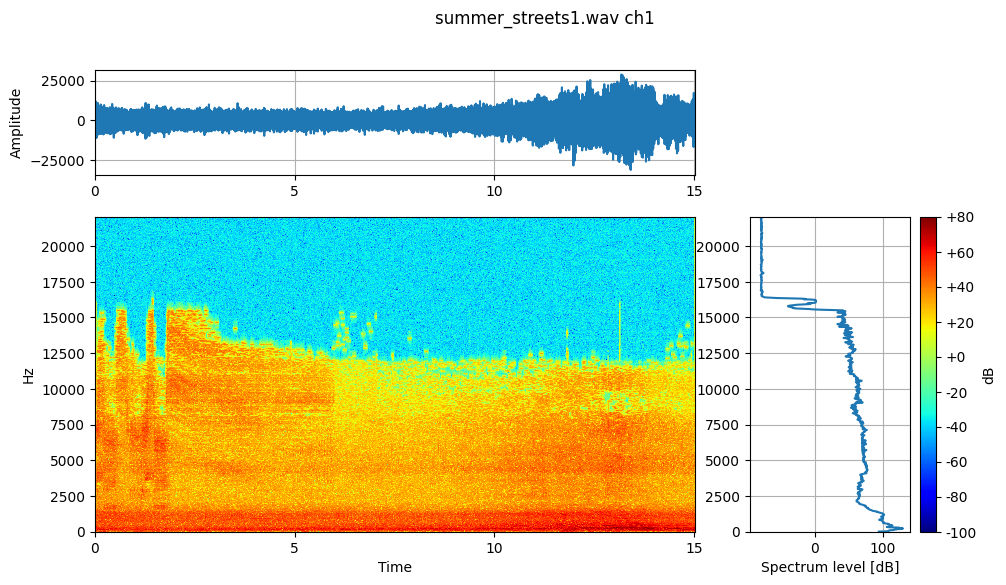

In [1]:
# Import the wandas library
import wandas as wd
import numpy as np
import matplotlib.pyplot as plt

# Download a sample WAV file (approximately 3 seconds)
# サンプル WAV をダウンロード（約 3 秒）
import urllib.request, pathlib
wav_path = "https://github.com/kasahart/wandas/raw/main/examples/data/summer_streets1.wav"
# Read the WAV file into a ChannelFrame object
# read_wav関数でWAVファイルをChannelFrameオブジェクトとして読み込み
cf = wd.read_wav(wav_path)

# Display basic information about the ChannelFrame
print(f"\nChannelFrame information:")
print(f"Number of channels: {cf.n_channels}")
print(f"Number of samples: {cf.n_samples}")
print(f"Sampling rate: {cf.sampling_rate} Hz")
print(f"Duration: {cf.duration:.2f} seconds")

# Display a comprehensive view of the audio data (waveform, spectrum, spectrogram)
# 時間波形・周波数特性・スペクトログラムを一括表示
print("\nVisualizing the audio data:")
cf.describe()


## Basic Data Structures in Wandas
*Wandasの基本データ構造*

Wandas provides several data structures designed to make audio and signal analysis intuitive and efficient:

*Wandasは音声・信号分析を直感的かつ効率的に行うための複数のデータ構造を提供しています：*

### Main Data Types
*主要なデータ型*

```
ChannelFrame   - Time-domain data (waveforms, audio signals)
               - 時間領域データ（波形、音声信号）

SpectralFrame  - Frequency-domain data (FFT results)
               - 周波数領域データ（FFT結果）

SpectrogramFrame - Time-frequency data (spectrograms) 
                 - 時間-周波数データ（スペクトログラム）

NOctFrame     - Octave band analysis data
               - オクターブバンド解析データ
```

### Key Features
*主要な機能*

- **ChannelFrame**: The most commonly used data structure for working with audio and time series data.  
  *音声や時系列データを扱うための最も一般的に使用されるデータ構造。*
  - Each ChannelFrame contains one or more channels of data
  - Supports various operations like filtering, resampling, and mathematical calculations
  - Easy indexing to access individual channels: `cf[0]` or `cf['channel_name']`

- **Rich Metadata**: All data structures carry useful information about the data:  
  *すべてのデータ構造はデータに関する有用な情報を保持しています：*
  - Sampling rate (サンプリングレート)
  - Channel labels (チャンネルラベル)
  - Units (単位)
  - Processing history (処理履歴)

- **Integrated Visualization**: Built-in plotting functions make it easy to visualize your data.  
  *内蔵のプロット機能でデータの可視化が簡単です。*
  - `cf.plot()` - Basic time-domain plot
  - `cf.describe()` - Comprehensive visualization with waveform, spectrum, and spectrogram

- **Smart Computation**: Wandas uses lazy evaluation, meaning it only performs computations when needed, improving efficiency for large datasets.  
  *Wandasは遅延評価を使用し、必要な時にのみ計算を実行することで、大規模データセットの効率を向上させます。*

Created sample CSV file at sensor_data.csv

CSV ChannelFrame information:
Number of channels: 3
Number of samples: 500
Sampling rate: 100.00 Hz (calculated from time column)
Duration: 5.00 seconds
Channel labels: ['accel_x', 'accel_y', 'accel_z']


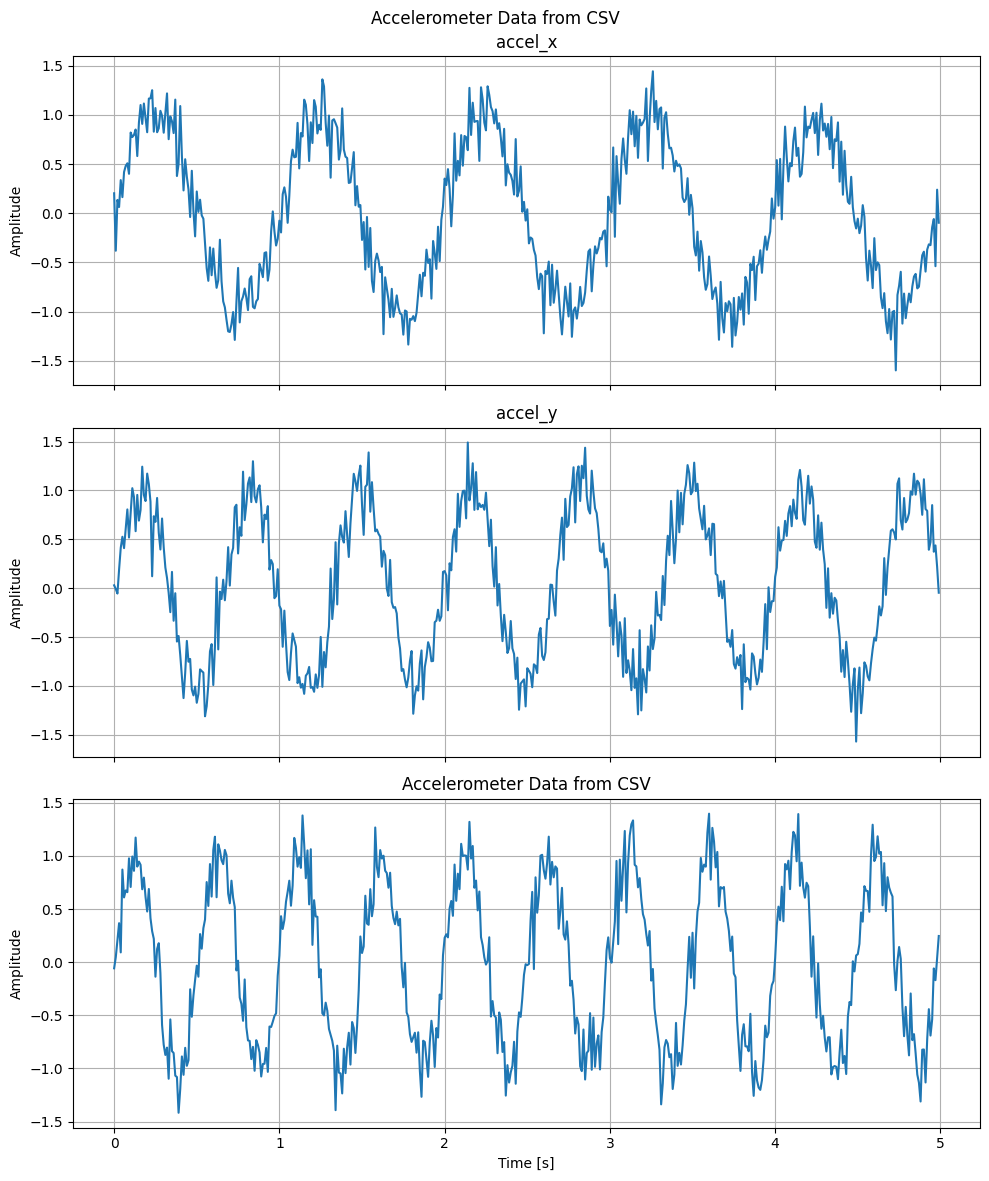

In [2]:
# Let's explore a CSV file with time series data
# CSVファイルから時系列データを読み込む例を見てみましょう

# First, we'll create a sample CSV file with some sensor data
import numpy as np

# Create sample sensor data
t = np.linspace(0, 5, 500)  # 5 seconds of data at 100Hz
accelerometer_x = np.sin(2 * np.pi * 1 * t) + 0.2 * np.random.randn(len(t))
accelerometer_y = np.sin(2 * np.pi * 1.5 * t) + 0.2 * np.random.randn(len(t))
accelerometer_z = np.sin(2 * np.pi * 2 * t) + 0.2 * np.random.randn(len(t))

# Create a ChannelFrame from numpy arrays
data = np.vstack([accelerometer_x, accelerometer_y, accelerometer_z])
ch_labels = ["accel_x", "accel_y", "accel_z"]
sensor_cf = wd.from_numpy(
    data=data,
    sampling_rate=100,  # 100Hz based on our time array
    ch_labels=ch_labels
)

# Save as CSV using Wandas
csv_path = pathlib.Path('sensor_data.csv')

# Creating a helper function to write CSV since Wandas doesn't have a direct to_csv method
def write_channel_frame_to_csv(cf, filepath, time_col=True):
    # Extract data and create time column if needed
    if time_col:
        time_data = np.arange(cf.n_samples) / cf.sampling_rate
        # Create a CSV file with time column
        with open(filepath, 'w') as f:
            # Write header
            header = ['time'] + cf.labels
            f.write(','.join(header) + '\n')

            # Write data
            for i in range(cf.n_samples):
                row = [f"{time_data[i]:.6f}"] + [f"{cf[j].data[0, i]:.6f}" for j in range(cf.n_channels)]
                f.write(','.join(row) + '\n')
    else:
        # Create a CSV file without time column
        with open(filepath, 'w') as f:
            # Write header
            f.write(','.join(cf.labels) + '\n')

            # Write data
            for i in range(cf.n_samples):
                row = [f"{cf[j].data[0, i]:.6f}" for j in range(cf.n_channels)]
                f.write(','.join(row) + '\n')
    return filepath

# Write to CSV
write_channel_frame_to_csv(sensor_cf, csv_path)
print(f"Created sample CSV file at {csv_path}")

# Read the CSV using Wandas
# read_csv関数でCSVファイルを読み込む
csv_cf = wd.read_csv(csv_path, time_column='time', delimiter=',')

# Display basic information
print(f"\nCSV ChannelFrame information:")
print(f"Number of channels: {csv_cf.n_channels}")
print(f"Number of samples: {csv_cf.n_samples}")
print(f"Sampling rate: {csv_cf.sampling_rate:.2f} Hz (calculated from time column)")
print(f"Duration: {csv_cf.duration:.2f} seconds")
print(f"Channel labels: {csv_cf.labels}")

# Plot the accelerometer data using Wandas plotting functionality
csv_cf.plot(title="Accelerometer Data from CSV")

## Data Access and Basic Operations
*データアクセスと基本操作*

Once you have loaded data into a ChannelFrame, you can access individual channels and perform basic operations:

*データをChannelFrameに読み込んだ後、個々のチャンネルにアクセスして基本的な操作を行うことができます：*

Available channels: ['accel_x', 'accel_y', 'accel_z']

Accessed 'accel_x' channel: shape=(1, 500)
Accessed channel at index 1 (accel_y): shape=(1, 500)

Plotting the original data and magnitude using Wandas:

Original accelerometer data:

Acceleration magnitude:


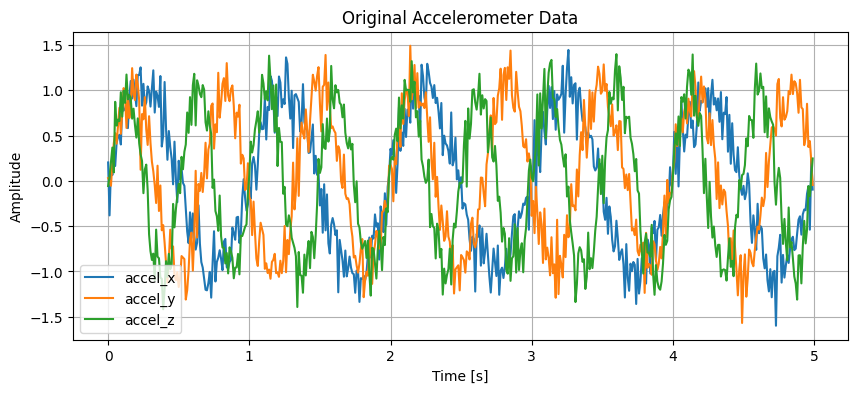

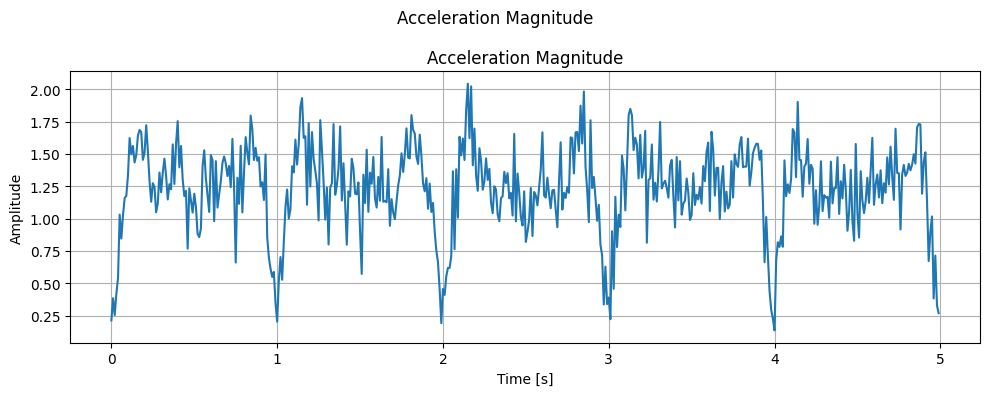


All channels including magnitude:


<Axes: title={'center': 'Accelerometer Data with Magnitude'}, xlabel='Time [s]', ylabel='Amplitude'>

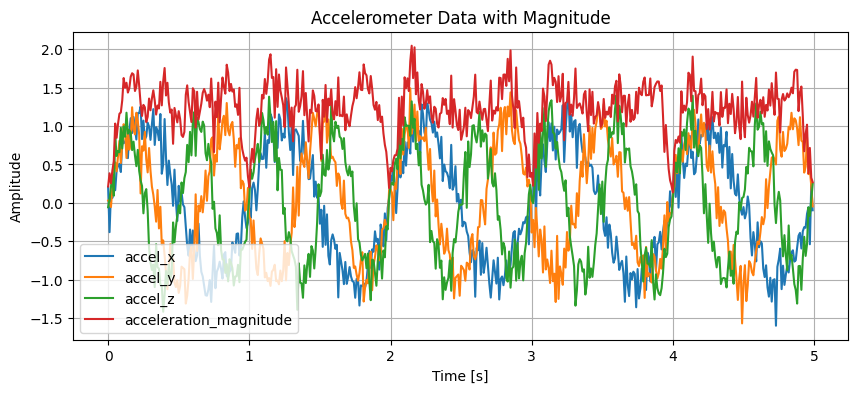

In [3]:
# Access individual channels and perform basic operations
# 個々のチャンネルにアクセスして基本的な操作を行う

# Let's work with the CSV data we just loaded
print("Available channels:", csv_cf.labels)

# Access a specific channel by name
x_channel = csv_cf['accel_x']
print(f"\nAccessed 'accel_x' channel: shape={x_channel.shape}")

# Access a specific channel by index
y_channel = csv_cf[1]  # the second channel (accel_y)
print(f"Accessed channel at index 1 (accel_y): shape={y_channel.shape}")

# Basic mathematical operations
# 基本的な数学操作
magnitude = np.sqrt(csv_cf['accel_x'].data**2 + csv_cf['accel_y'].data**2 + csv_cf['accel_z'].data**2)

# Create a new ChannelFrame with the calculated magnitude
# 計算した大きさを持つ新しいChannelFrameを作成
mag_cf = wd.from_numpy(
    data=magnitude,  # Use the underlying data array
    sampling_rate=csv_cf.sampling_rate,
    ch_labels=["acceleration_magnitude"]
)

# Create a combined ChannelFrame for visualization
# Original channels + magnitude in a single frame
combined_cf = csv_cf.add_channel(mag_cf[0], label="magnitude", align="strict")

# Use Wandas plotting functionality instead of direct matplotlib calls
print("\nPlotting the original data and magnitude using Wandas:")

# Plot original data
print("\nOriginal accelerometer data:")
csv_cf.plot(title="Original Accelerometer Data", overlay=True)

# Plot calculated magnitude
print("\nAcceleration magnitude:")
mag_cf.plot(title="Acceleration Magnitude")

# Alternative: Display them together with all channels in a single plot
print("\nAll channels including magnitude:")
combined_cf.plot(title="Accelerometer Data with Magnitude", overlay=True)

## Writing Data to Files
*データのファイルへの書き出し*

Wandas provides functions to write data back to various file formats:

*Wandasはデータをさまざまなファイル形式に書き出す関数を提供しています：*

Saved audio data to processed_audio.wav
Saved sensor data with metadata to sensor_data.wdf

Loaded data from WDF file:
Number of channels: 3
Channel labels: ['accel_x', 'accel_y', 'accel_z']
Sampling rate: 100.00 Hz


<Axes: title={'center': 'Loaded data from WDF file'}, xlabel='Time [s]', ylabel='Amplitude'>

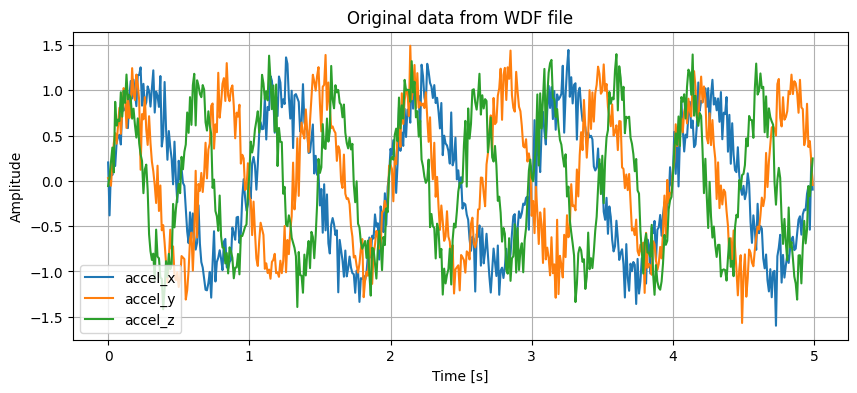

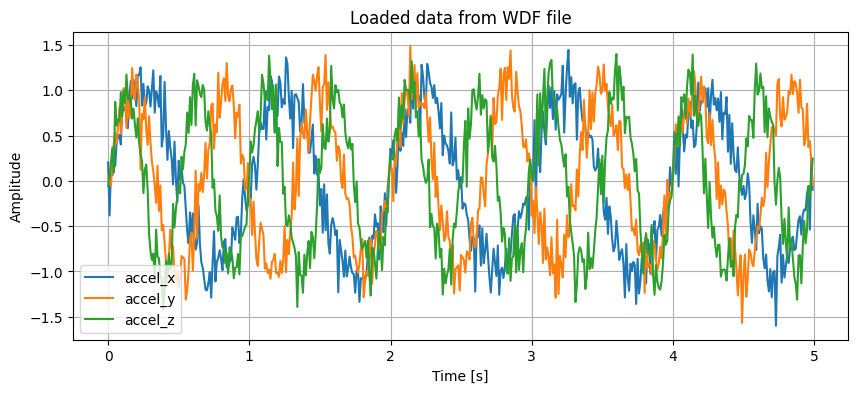

In [6]:
# Example of writing data to various formats
# データを様々な形式で書き出す例

# 1. Save to WAV file
# WAVファイルとして保存
output_wav_path = pathlib.Path('processed_audio.wav')
cf.to_wav(output_wav_path)
print(f"Saved audio data to {output_wav_path}")

# 2. Save to WDF file (Wandas Data Format with metadata)
# メタデータ付きWandasデータ形式として保存
output_wdf_path = pathlib.Path('sensor_data.wdf')
csv_cf.save(output_wdf_path, overwrite=True)
print(f"Saved sensor data with metadata to {output_wdf_path}")

# 3. Load data back from the WDF file
# WDFファイルからデータを読み込む
loaded_cf = wd.ChannelFrame.load(output_wdf_path)
print(f"\nLoaded data from WDF file:")
print(f"Number of channels: {loaded_cf.n_channels}")
print(f"Channel labels: {loaded_cf.labels}")
print(f"Sampling rate: {loaded_cf.sampling_rate:.2f} Hz")

csv_cf.plot(title="Original data from WDF file", overlay=True)
loaded_cf.plot(title="Loaded data from WDF file", overlay=True)

## Practical Use Case: Audio Processing
*実践的なユースケース：音声処理*

Let's work through a complete example of loading an audio file, applying some processing, and saving the result:

*音声ファイルを読み込み、処理を適用し、結果を保存する完全な例を見てみましょう：*


Created stereo audio with echo effect: stereo_with_echo.wav

Stereo audio with echo effect:


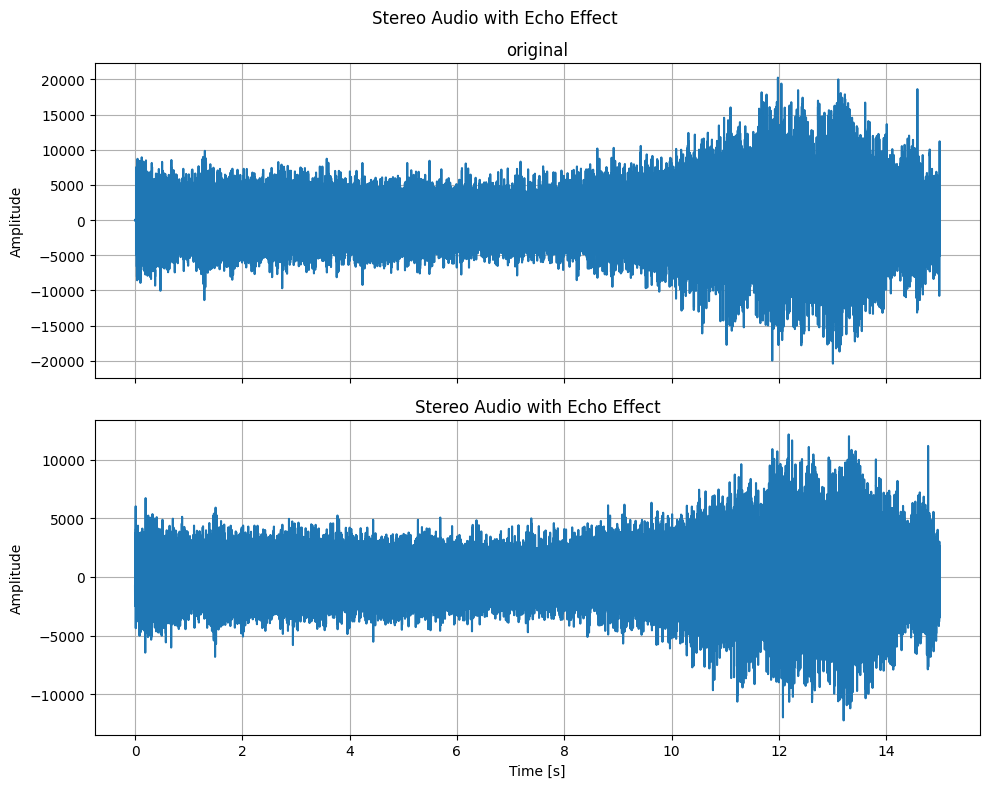

In [5]:
# Complete example: Load audio, process, and save
# 完全な例：音声を読み込み、処理し、保存する

# Get the original audio data
mono_audio = cf[0]

# Create a modified version with a slight delay (echo effect)
delay_samples = int(0.2 * cf.sampling_rate)  # 200ms delay
echo_audio = (np.roll(mono_audio.data, delay_samples) * 0.6).astype(mono_audio.data.dtype)  # 60% volume

# Stack into a stereo ChannelFrame
stereo_data = np.vstack([mono_audio, echo_audio])
stereo_cf = wd.from_numpy(
    data=stereo_data,
    sampling_rate=cf.sampling_rate,
    ch_labels=["original", "echo"]
)

# Save as stereo WAV file
stereo_wav_path = pathlib.Path('stereo_with_echo.wav')
stereo_cf.to_wav(stereo_wav_path)
print(f"\nCreated stereo audio with echo effect: {stereo_wav_path}")

# Plot using Wandas plotting functionality
print("\nStereo audio with echo effect:")
stereo_cf.plot(title="Stereo Audio with Echo Effect")
import IPython.display as ipd
ipd.display(ipd.Audio(str(stereo_wav_path)))


## Next Steps
*次のステップ*

In this notebook, you've learned the basics of working with data files in Wandas, including:

*このノートブックでは、Wandasでのデータファイルの操作の基本を学びました。学んだ内容は以下の通りです：*

- Reading WAV and CSV files  
  *WAVおよびCSVファイルの読み込み*
- Understanding the ChannelFrame data structure  
  *ChannelFrameデータ構造の理解*
- Accessing and manipulating channel data  
  *チャンネルデータへのアクセスと操作*
- Writing data to various file formats  
  *様々なファイル形式へのデータの書き出し*
- Applying simple processing to audio data  
  *音声データへの簡単な処理の適用*

In the next notebook, we'll explore signal processing techniques in Wandas, including filtering, resampling, and other transformations.

*次のノートブックでは、フィルタリング、リサンプリング、その他の変換など、Wandasでの信号処理テクニックを探索します。*

**Next notebook**: [02_signal_processing_basics.ipynb](./02_signal_processing_basics.ipynb)  
*次のノートブック： [02_signal_processing_basics.ipynb](./02_signal_processing_basics.ipynb)*